In [1]:
import os
import pandas as pd
import random
import networkx as nx
from networkx.algorithms import bipartite
import community
import matplotlib.pyplot as plt

In [2]:
os.listdir('./ml-100k/data')

['allbut.pl',
 'mku.sh',
 'README',
 'u.data',
 'u.genre',
 'u.info',
 'u.item',
 'u.occupation',
 'u.user',
 'u1.base',
 'u1.test',
 'u2.base',
 'u2.test',
 'u3.base',
 'u3.test',
 'u4.base',
 'u4.test',
 'u5.base',
 'u5.test',
 'ua.base',
 'ua.test',
 'ub.base',
 'ub.test']

In [3]:
f_u_data=open("./ml-100k/data/u.data",'r')
u_data=[ele.strip().split("\n")[0].split("\t") for ele in f_u_data.readlines()]
u_data[0:5]

[['196', '242', '3', '881250949'],
 ['186', '302', '3', '891717742'],
 ['22', '377', '1', '878887116'],
 ['244', '51', '2', '880606923'],
 ['166', '346', '1', '886397596']]

In [4]:
f_u_item=open("./ml-100k/data/u.item",'r')
u_item=[ele.strip(' \n').split("|") for ele in f_u_item.readlines()]
u_item[0:5]

[['1',
  'Toy Story (1995)',
  '01-Jan-1995',
  '',
  'http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)',
  '0',
  '0',
  '0',
  '1',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['2',
  'GoldenEye (1995)',
  '01-Jan-1995',
  '',
  'http://us.imdb.com/M/title-exact?GoldenEye%20(1995)',
  '0',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0'],
 ['3',
  'Four Rooms (1995)',
  '01-Jan-1995',
  '',
  'http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0'],
 ['4',
  'Get Shorty (1995)',
  '01-Jan-1995',
  '',
  'http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)',
  '0',
  '1',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['5',
  'Copycat 

In [5]:
f_u_user=open("./ml-100k/data/u.user",'r')
u_user=[ele.strip('\n').split("|") for ele in f_u_user.readlines()]
u_user[:5]


[['1', '24', 'M', 'technician', '85711'],
 ['2', '53', 'F', 'other', '94043'],
 ['3', '23', 'M', 'writer', '32067'],
 ['4', '24', 'M', 'technician', '43537'],
 ['5', '33', 'F', 'other', '15213']]

In [6]:
df_u_user=pd.DataFrame(u_user,columns=["user_id","age","gender","profession","rand"])
df_u_user.head()

,user_id,age,gender,profession,rand
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [7]:
df_u_data=pd.DataFrame(u_data,columns=["user_id","movie_id","rating","timestamp"])

In [8]:
df_u_data.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
u_item[0:5]
df_u_item=pd.DataFrame(u_item,columns=["movie_id","movie_name","year","blank","link",*[str(i) for i in range(1,20)]])

In [10]:
df_u_item=df_u_item.drop(["blank","link"],axis=1)
df_u_item.head()


,movie_id,movie_name,year,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [11]:
df_merged_data=pd.merge(df_u_data,df_u_user,on="user_id")
df_merged_data=pd.merge(df_merged_data,df_u_item,on="movie_id")


In [12]:
df_merged_data.head()

,user_id,movie_id,rating,timestamp,age,gender,profession,rand,movie_name,year,...,10,11,12,13,14,15,16,17,18,19
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [13]:
unique_users=list(set(df_merged_data['user_id'][:]))
unique_users.sort()
print(unique_users[0:5])
print(len(unique_users))

['1', '10', '100', '101', '102']
943


In [14]:
random.seed(1000)
sample=random.choices(unique_users,k=400)

In [15]:
sample_data=df_merged_data.loc[df_merged_data["user_id"].isin(sample)]

In [16]:
sample_data.head()

,user_id,movie_id,rating,timestamp,age,gender,profession,rand,movie_name,year,...,10,11,12,13,14,15,16,17,18,19
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
5,181,242,1,878961814,26,M,executive,21218,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
7,249,242,5,879571438,25,M,student,84103,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
9,279,242,3,877756647,33,M,programmer,85251,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [17]:
user_list=[x for x in sample_data['user_id']]
item_list=[str(x) for x in sample_data['movie_name']]
touples=[(user_list[i],item_list[i]) for i in range(len(user_list))]

In [18]:
bip=nx.Graph()
bip.add_nodes_from(user_list,bipartite=0)
bip.add_nodes_from(item_list,bipartitie=1)
bip.add_edges_from(touples)

In [19]:
user_nodes,item_nodes = bipartite.sets(bip)
user_proj = bipartite.projected_graph(bip, user_nodes)
item_proj = bipartite.projected_graph(bip, item_nodes) 

In [20]:
#print(item_proj.nodes())

In [21]:
random.seed(1000)
part = community.community_louvain.best_partition(item_proj)
#print(part)

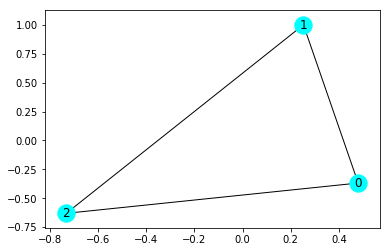

In [22]:
#random.seed(1000)
induced =community.community_louvain.induced_graph(part,item_proj)
# print(induced.nodes())
# print(induced.edges())
nx.draw_networkx(induced,node_color='cyan')
plt.show()

In [23]:
community={0:[],1:[],2:[]}
for key,value in part.items():
    community[value].append(key)

In [24]:
community[0]

['Ed Wood (1994)',
 'Bitter Moon (1992)',
 'True Lies (1994)',
 'Goofy Movie, A (1995)',
 'Short Cuts (1993)',
 'Heavenly Creatures (1994)',
 'Candidate, The (1972)',
 'Grand Day Out, A (1992)',
 'Prisoner of the Mountains (Kavkazsky Plennik) (1996)',
 'Delicatessen (1991)',
 "City Slickers II: The Legend of Curly's Gold (1994)",
 'Here Comes Cookie (1935)',
 'E.T. the Extra-Terrestrial (1982)',
 'Love & Human Remains (1993)',
 'Little Princess, The (1939)',
 'Romeo Is Bleeding (1993)',
 'Fugitive, The (1993)',
 'Cowboy Way, The (1994)',
 'Star Trek: First Contact (1996)',
 'To Catch a Thief (1955)',
 'Winnie the Pooh and the Blustery Day (1968)',
 'Mr. Magoo (1997)',
 'Koyaanisqatsi (1983)',
 'Alphaville (1965)',
 'Waterworld (1995)',
 'Bhaji on the Beach (1993)',
 'Dirty Dancing (1987)',
 'Little Buddha (1993)',
 'Forbidden Planet (1956)',
 'Night of the Living Dead (1968)',
 'Persuasion (1995)',
 'Sling Blade (1996)',
 'Cyclo (1995)',
 'Man of No Importance, A (1994)',
 'Hour of the

In [25]:
community[1]

['Picture Perfect (1997)',
 'Fly Away Home (1996)',
 'Newton Boys, The (1998)',
 'Volcano (1997)',
 'Female Perversions (1996)',
 'All Over Me (1997)',
 'Quiet Room, The (1996)',
 'Big Lebowski, The (1998)',
 "Devil's Own, The (1997)",
 'Leading Man, The (1996)',
 'Head Above Water (1996)',
 'Twin Town (1997)',
 'Wild Things (1998)',
 'Nénette et Boni (1996)',
 'Austin Powers: International Man of Mystery (1997)',
 'Nothing Personal (1995)',
 'Twisted (1996)',
 "Gone Fishin' (1997)",
 'Wag the Dog (1997)',
 'Wings of the Dove, The (1997)',
 'Gattaca (1997)',
 'Hugo Pool (1997)',
 'Salut cousin! (1996)',
 'MURDER and murder (1996)',
 'Senseless (1998)',
 'Moonlight and Valentino (1995)',
 'True Crime (1995)',
 'Trial and Error (1997)',
 'Ripe (1996)',
 'Home Alone 3 (1997)',
 'Tomorrow Never Dies (1997)',
 'Anastasia (1997)',
 'Replacement Killers, The (1998)',
 'Commandments (1997)',
 "Ulee's Gold (1997)",
 'Nightwatch (1997)',
 'Warriors of Virtue (1997)',
 'Night Flier (1997)',
 'Los

In [26]:
community[2]

['Hollow Reed (1996)',
 "Roseanna's Grave (For Roseanna) (1997)",
 'Cop Land (1997)',
 "Wooden Man's Bride, The (Wu Kui) (1994)",
 'Larger Than Life (1996)',
 'Every Other Weekend (1990)',
 'Bed of Roses (1996)',
 'Hedd Wyn (1992)',
 'Dracula: Dead and Loving It (1995)',
 'Welcome to the Dollhouse (1995)',
 'That Darn Cat! (1997)',
 'Career Girls (1997)',
 'Chain Reaction (1996)',
 "I'm Not Rappaport (1996)",
 'Anne Frank Remembered (1995)',
 'Black Sheep (1996)',
 'Dead Man (1995)',
 'Hotel de Love (1996)',
 'Screamers (1995)',
 "Antonia's Line (1995)",
 'Ransom (1996)',
 'Stalingrad (1993)',
 'Bird of Prey (1996)',
 'Squeeze (1996)',
 'Bio-Dome (1996)',
 'For the Moment (1994)',
 'Spitfire Grill, The (1996)',
 'Indian Summer (1996)',
 'Boys in Venice (1996)',
 'Tales from the Crypt Presents: Bordello of Blood (1996)',
 'Hunchback of Notre Dame, The (1996)',
 "Preacher's Wife, The (1996)",
 'Free Willy 3: The Rescue (1997)',
 'Diabolique (1996)',
 'First Wives Club, The (1996)',
 'Sec

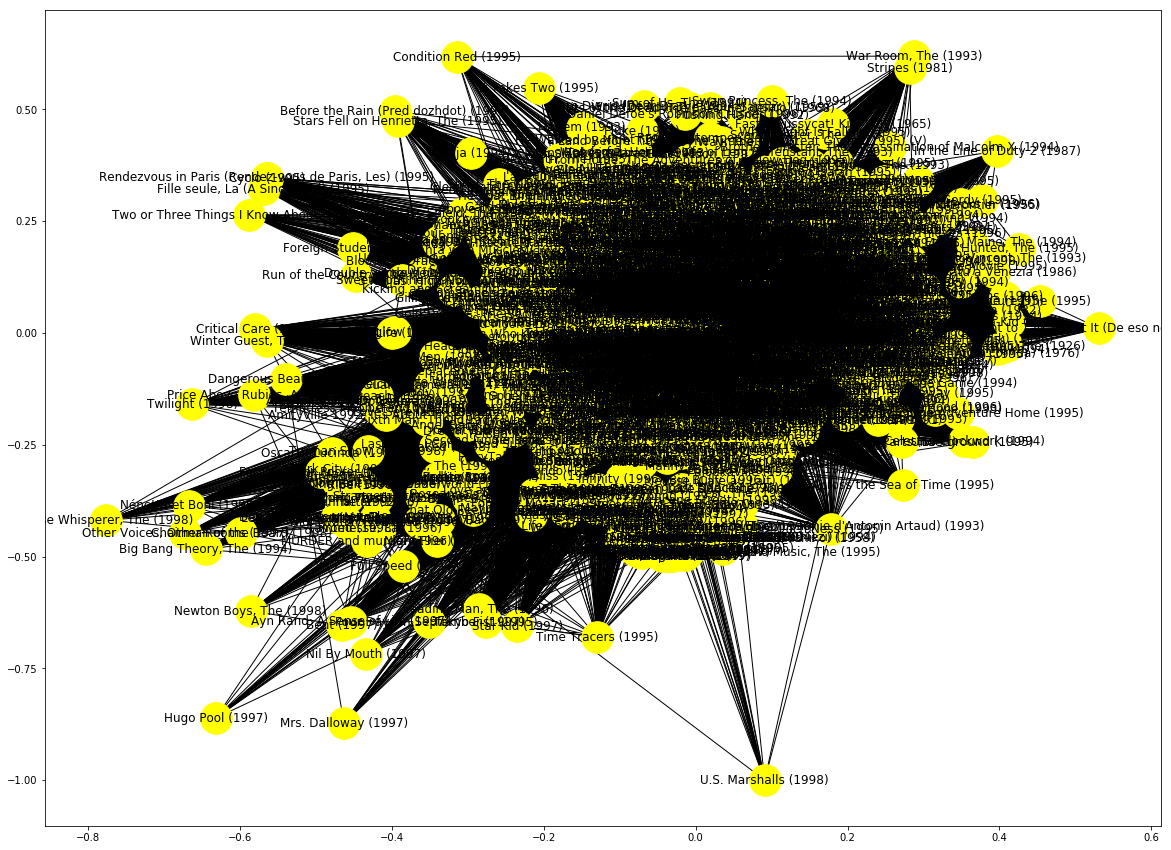

In [33]:
plt.figure(figsize=(20,15))
nx.draw_networkx(item_proj,with_labels=True, node_size=1000,node_color='yellow')